## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE =[2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = 'batch_size_%s' % str(batch_size)
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

50000/50000 [==============================] - 350s 7ms/step - loss: 2.2031 - acc: 0.1856 - val_loss: 3.0711 - val_acc: 0.2248
Epoch 46/50
50000/50000 [==============================] - 350s 7ms/step - loss: 2.1984 - acc: 0.1871 - val_loss: 2.6066 - val_acc: 0.2464
Epoch 47/50
50000/50000 [==============================] - 350s 7ms/step - loss: 2.1974 - acc: 0.1902 - val_loss: 3.2040 - val_acc: 0.2312
Epoch 48/50
50000/50000 [==============================] - 350s 7ms/step - loss: 2.1980 - acc: 0.1932 - val_loss: 2.9234 - val_acc: 0.2456
Epoch 49/50
50000/50000 [==============================] - 350s 7ms/step - loss: 2.1987 - acc: 0.1914 - val_loss: 2.9500 - val_acc: 0.2381
Epoch 50/50
50000/50000 [==============================] - 350s 7ms/step - loss: 2.1976 - acc: 0.1905 - val_loss: 3.1259 - val_acc: 0.2542
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)     

50000/50000 [==============================] - 46s 919us/step - loss: 1.1891 - acc: 0.5783 - val_loss: 1.3672 - val_acc: 0.5147
Epoch 44/50
50000/50000 [==============================] - 46s 915us/step - loss: 1.1879 - acc: 0.5774 - val_loss: 1.3617 - val_acc: 0.5162
Epoch 45/50
50000/50000 [==============================] - 46s 913us/step - loss: 1.1880 - acc: 0.5789 - val_loss: 1.3893 - val_acc: 0.5148
Epoch 46/50
50000/50000 [==============================] - 46s 915us/step - loss: 1.1925 - acc: 0.5764 - val_loss: 1.3671 - val_acc: 0.5155
Epoch 47/50
50000/50000 [==============================] - 46s 915us/step - loss: 1.2002 - acc: 0.5766 - val_loss: 1.3807 - val_acc: 0.5178
Epoch 48/50
50000/50000 [==============================] - 46s 916us/step - loss: 1.1951 - acc: 0.5746 - val_loss: 1.3639 - val_acc: 0.5198
Epoch 49/50
50000/50000 [==============================] - 46s 914us/step - loss: 1.1853 - acc: 0.5825 - val_loss: 1.3723 - val_acc: 0.5207
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 24s 480us/step - loss: 0.8933 - acc: 0.6809 - val_loss: 1.5410 - val_acc: 0.4981
Epoch 42/50
50000/50000 [==============================] - 24s 481us/step - loss: 0.8951 - acc: 0.6798 - val_loss: 1.5221 - val_acc: 0.5103
Epoch 43/50
50000/50000 [==============================] - 24s 480us/step - loss: 0.8830 - acc: 0.6828 - val_loss: 1.5205 - val_acc: 0.5057
Epoch 44/50
50000/50000 [==============================] - 24s 481us/step - loss: 0.8787 - acc: 0.6869 - val_loss: 1.4510 - val_acc: 0.5173
Epoch 45/50
50000/50000 [==============================] - 24s 480us/step - loss: 0.8729 - acc: 0.6878 - val_loss: 1.5486 - val_acc: 0.5088
Epoch 46/50
50000/50000 [==============================] - 24s 480us/step - loss: 0.8618 - acc: 0.6906 - val_loss: 1.4897 - val_acc: 0.5159
Epoch 47/50
50000/50000 [==============================] - 24s 480us/step - loss: 0.8662 - acc: 0.6917 - val_loss: 1.5173 - val_acc: 0.5145
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 9s 178us/step - loss: 0.4818 - acc: 0.8262 - val_loss: 2.3229 - val_acc: 0.4697
Epoch 40/50
50000/50000 [==============================] - 9s 179us/step - loss: 0.4704 - acc: 0.8306 - val_loss: 2.1621 - val_acc: 0.4807
Epoch 41/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.4633 - acc: 0.8321 - val_loss: 2.1299 - val_acc: 0.4779
Epoch 42/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.4467 - acc: 0.8391 - val_loss: 2.1411 - val_acc: 0.4986
Epoch 43/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.4434 - acc: 0.8395 - val_loss: 2.2368 - val_acc: 0.4768
Epoch 44/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.4341 - acc: 0.8426 - val_loss: 2.6636 - val_acc: 0.4428
Epoch 45/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.4240 - acc: 0.8472 - val_loss: 2.3032 - val_acc: 0.4867
Epoch 46/50
50000/50000 [==============

50000/50000 [==============================] - 6s 122us/step - loss: 0.3535 - acc: 0.8751 - val_loss: 2.2892 - val_acc: 0.4932
Epoch 38/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.3448 - acc: 0.8778 - val_loss: 2.4205 - val_acc: 0.4781
Epoch 39/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.3261 - acc: 0.8859 - val_loss: 2.5976 - val_acc: 0.4651
Epoch 40/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.3173 - acc: 0.8863 - val_loss: 2.3436 - val_acc: 0.4861
Epoch 41/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.2986 - acc: 0.8959 - val_loss: 2.6338 - val_acc: 0.4719
Epoch 42/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.2957 - acc: 0.8966 - val_loss: 2.4829 - val_acc: 0.4826
Epoch 43/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.2980 - acc: 0.8945 - val_loss: 2.4680 - val_acc: 0.4806
Epoch 44/50
50000/50000 [==============

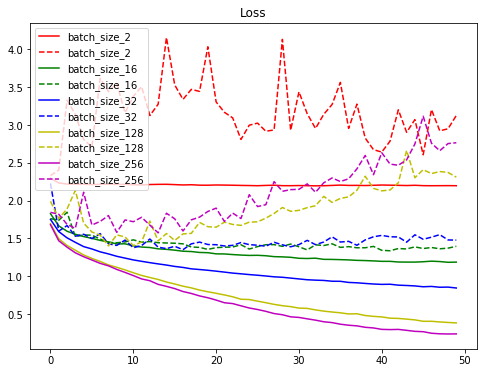

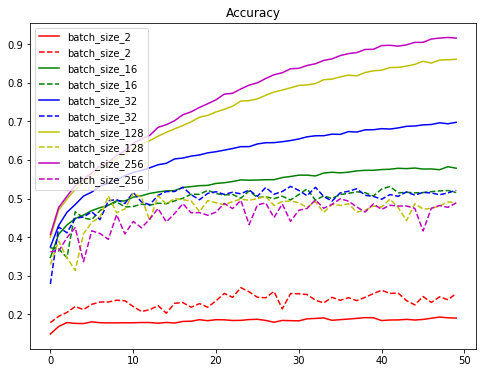

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()